<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
from matplotlib import pyplot as plt

In [2]:
np.random.normal(loc=5, scale=2, size=10)

array([3.07715664, 1.74936472, 8.25919812, 5.9469849 , 3.29901543,
       1.88669893, 3.80801305, 5.5882186 , 5.06268461, 3.55323269])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

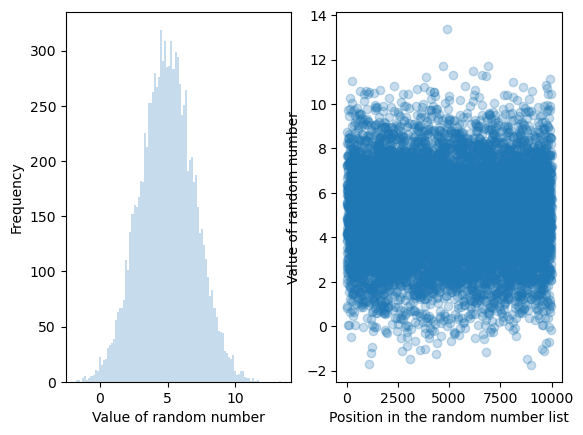

In [3]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.62%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [ ]:

# Your code here


### 1.2 The simulation

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

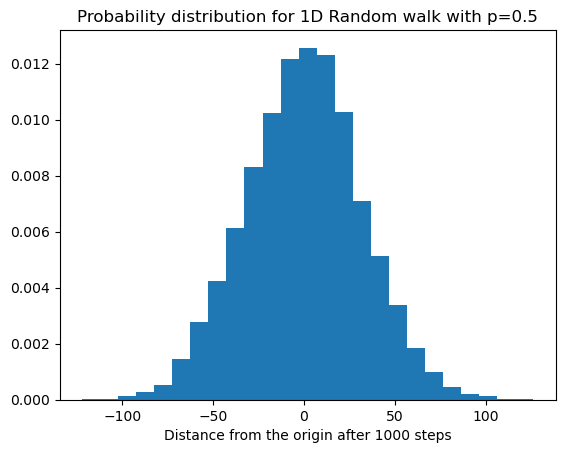

In [8]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

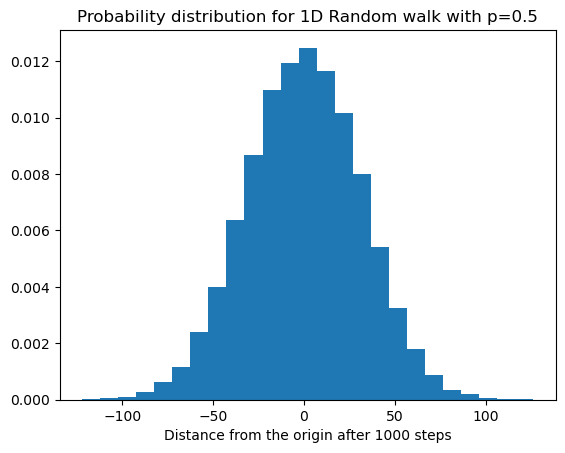

In [9]:
def brown_1d(prob_right=.6, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

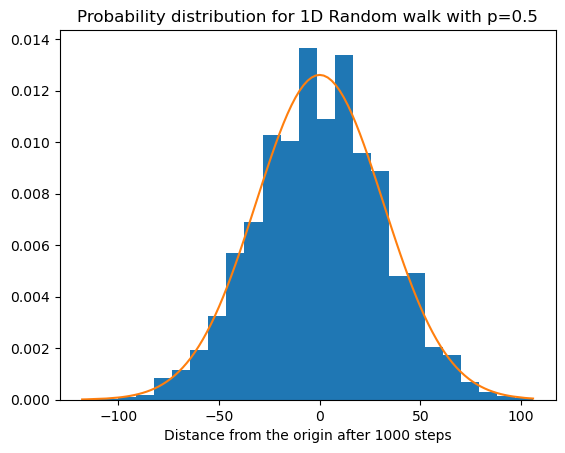

In [6]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output
prob_right=.5
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [ ]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

### 2.3 A better solution

In [7]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)
# Your code here


3.140396

### 2.4 A smarter solution

In [8]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.14246

## Exercise 1 :  Vital Stats of Random π

In [9]:
def estimate_pi(n):
    N_total=n
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)

    return 4 * (N_green / N_total)

pi_est = []
for i in range(0,100):
    #print(estimate_pi(n=10000))
    pi_est.append(estimate_pi(n=10000))
#print(pi_est)

mean_pi_est = np.mean(pi_est)
print(mean_pi_est)

std_pi_est = np.std(pi_est)
print(std_pi_est)

3.1411439999999997
0.01461539133926971


In [10]:
def estimate_pi(n):
    N_total=n
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)

    return 4 * (N_green / N_total)

pi_est = [estimate_pi(n=10000) for i in range(100)]
print(pi_est)

mean_pi_est = np.mean(pi_est)
print(mean_pi_est)

std_pi_est = np.std(pi_est)
print(std_pi_est)

[3.1088, 3.102, 3.1376, 3.1224, 3.1628, 3.13, 3.1432, 3.1224, 3.154, 3.152, 3.132, 3.1464, 3.1504, 3.154, 3.1276, 3.1208, 3.1576, 3.13, 3.1412, 3.1296, 3.1404, 3.1464, 3.1156, 3.1472, 3.1404, 3.1312, 3.1432, 3.1196, 3.1496, 3.1268, 3.1208, 3.1284, 3.1324, 3.1668, 3.1056, 3.1152, 3.134, 3.1528, 3.1356, 3.1572, 3.1784, 3.1444, 3.114, 3.1148, 3.1384, 3.1252, 3.128, 3.1144, 3.1504, 3.1536, 3.1348, 3.1668, 3.1236, 3.1572, 3.1344, 3.1564, 3.1408, 3.0964, 3.1176, 3.1776, 3.1272, 3.1468, 3.1524, 3.1512, 3.1528, 3.1172, 3.1156, 3.1304, 3.146, 3.1516, 3.1592, 3.1708, 3.1372, 3.1516, 3.1496, 3.1132, 3.1652, 3.1572, 3.1264, 3.1368, 3.118, 3.1488, 3.1472, 3.1292, 3.1372, 3.1284, 3.1408, 3.1536, 3.1624, 3.11, 3.1452, 3.144, 3.1572, 3.1212, 3.1428, 3.164, 3.1568, 3.122, 3.1584, 3.1392]
3.1388599999999998
0.017332085852545268


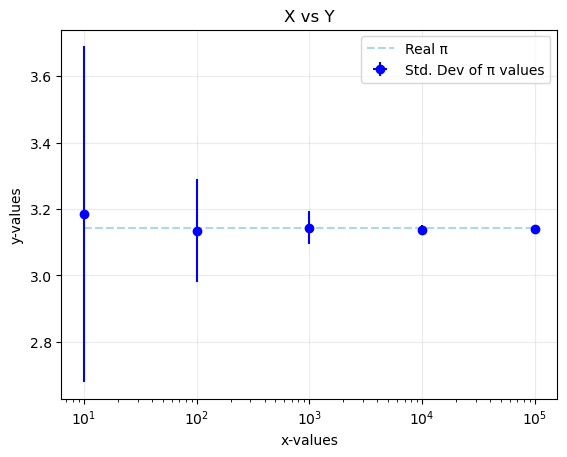

In [15]:
def estimate_pi(n):
    N_total=n
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)

    return 4 * (N_green / N_total)

pi_est = [estimate_pi(n=10000) for i in range(100)]
#print(pi_est)

mean_pi_est = np.mean(pi_est)
#print(mean_pi_est)

std_pi_est = np.std(pi_est)
#print(std_pi_est)

y = []
x = [10, 10**2, 10**3, 10**4, 10**5]
v = []
y_error = []
for point in x:
    pi_est = [estimate_pi(n=point) for i in range(100)]
    #print(pi_est)
    v.append(np.pi)
    mean_pi_est = np.mean(pi_est)
    y.append(mean_pi_est)
 
    std_pi_est = np.std(pi_est)
    y_error.append(std_pi_est)
   
#print(y)
#print(yerr)
#print(v)

plt.plot(x, v, color='lightblue', linestyle='dashed', label='Real π')
plt.errorbar(x, y, xerr=0, yerr=y_error,fmt = 'o',
             color='blue', label='Std. Dev of π values')
plt.xscale('log')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper right')
plt.show()
    
